In [2]:
%matplotlib  inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import os
from plotting_utils import label_prep, label_sample
from sequencing_tools.viz_tools import color_encoder, okabeito_palette
plt.rc('axes', labelsize=15)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

In [3]:
size_path = '/stor/work/Lambowitz/cdw2854/cfNA/tgirt_map/fragment_sizes'
f_files = glob.glob(size_path + '/*.feather')
df = pd.concat(map(lambda x: pd.read_feather(x)\
                       .assign(prep = os.path.basename(x)), 
                   f_files))  \
    .assign(prep = lambda d: d.prep.str.replace('.feather$',''))\
    .query('isize < 500')\
    .assign(size_fraction = lambda d: d.groupby('bed').size_count.transform(lambda x: 100*x/x.sum()))\
    .groupby(['prep','isize'], as_index=False)\
    .agg({'size_fraction':'median'})  \
    .assign(prep = lambda d: d.prep.map(label_prep))
df.head()

/stor/work/Lambowitz/cdw2854/src/miniconda3/lib/python3.6/site-packages/pandas/io/feather_format.py:112: FutureWarning: `nthreads` argument is deprecated, pass `use_threads` instead
  return feather.read_dataframe(path, nthreads=nthreads)


,prep,isize,size_fraction
0,EV,15,0.081766
1,EV,16,1.471791
2,EV,17,1.390025
3,EV,18,0.490597
4,EV,19,3.025348


/stor/work/Lambowitz/cdw2854/src/miniconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


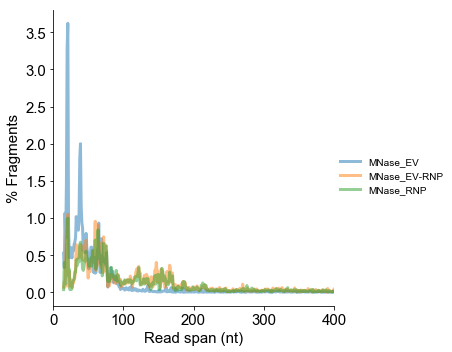

In [9]:
p = sns.FacetGrid(data = df\
                      .pipe(lambda d: d[~d.prep.str.contains('genome|[Pp]oly')])\
                      .pipe(lambda d: d[d.prep.str.contains('EV|RNP')])\
                      .pipe(lambda d: d[d.prep.str.contains('MNase')]), 
                  hue = 'prep',
                 size = 5)
p.map(plt.plot, 'isize',  'size_fraction', alpha=0.5, linewidth=3)
p.set(xlim=(0,400))
p.add_legend(title='')
p.set_axis_labels('Read span (nt)', '% Fragments')